In [1]:
import pandas as pd

# load automatic evaluation results
auto_eval_df = pd.read_csv('analysis_results/golden_qa_india_auto_eval.csv')
auto_eval_df.describe(include='all')

,question_id,question,correct_answer,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,rougeL,rougeLsum,embedding_cosine_similarity,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility
count,135.000000,135,135,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135,135,135.000000,135.000000,135.000000,135.000000
unique,NaN,15,15,9,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",anthropic-claude-3-7-sonnet-20250219,NaN,# Improving Your Pest Control Approach\n\nWhen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN
freq,NaN,9,9,15,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133,134,NaN,NaN,NaN,NaN
mean,8.000000,NaN,NaN,NaN,68.000000,NaN,0.225447,0.087776,0.171898,0.034541,0.107157,0.121262,0.647513,NaN,NaN,3.348148,4.874074,4.740741,3.903704
std,4.336585,NaN,NaN,NaN,39.115214,NaN,0.070615,0.036667,0.064965,0.031602,0.043313,0.048231,0.119112,NaN,NaN,0.775738,0.333001,0.456511,0.296096
min,1.000000,NaN,NaN,NaN,1.000000,NaN,0.014664,0.009709,0.031250,0.000000,0.031250,0.031250,0.315316,NaN,NaN,1.000000,4.000000,3.000000,3.000000
25%,4.000000,NaN,NaN,NaN,34.500000,NaN,0.179214,0.061051,0.121717,0.011080,0.072738,0.082364,0.582766,NaN,NaN,3.000000,5.000000,4.500000,4.000000
50%,8.000000,NaN,NaN,NaN,68.000000,NaN,0.227437,0.090909,0.179104,0.025641,0.101695,0.118721,0.671542,NaN,NaN,4.000000,5.000000,5.000000,4.000000
75%,12.000000,NaN,NaN,NaN,101.500000,NaN,0.264144,0.114479,0.216327,0.051957,0.133933,0.154069,0.739070,NaN,NaN,4.000000,5.000000,5.000000,4.000000


In [2]:
# load human evaluation results
human_eval_df = pd.read_csv('data/RAW_goldenqa_iteration1_oe_india_REVISED_llm_responses_eval.csv')
human_eval_df.describe(include='all')

,LLM,Q-ID,response_id,Question,Response,Place,Response factually correct,Only if not factually correct: Is this response materially harmful?,Response comprehensive,Response relevant,Response actionable,Response intelligible for smallholder farmer,Comment,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,135,135.000000,135.000000,135,135,135,135,0.0,135,135,135,135,0.0,0.0,0.0,0.0,0.0
unique,9,NaN,NaN,15,135,1,1,NaN,3,3,2,2,NaN,NaN,NaN,NaN,NaN
top,openai-gpt-4o-2024-08-06,NaN,NaN,I am interested in learning about crops and li...,To learn more about crops and livestock produc...,India,Yes,NaN,3 Response contains most key information,4 Response is mostly relevant for a smallholde...,5 Response is completely actionable for a smal...,3 Response is mostly intelligible.,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,9,1,135,135,NaN,79,67,74,104,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.000000,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.336585,39.115214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.000000,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,12.000000,101.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# drop unnamed columns
human_eval_df = human_eval_df.loc[:, ~human_eval_df.columns.str.contains('^Unnamed')]

# rename columns for consistency
human_eval_df = human_eval_df.rename(columns={
    'Response factually correct': 'factual_correctness',
    'Only if not factually correct: Is this response materially harmful?': 'harmfulness',
    'Response comprehensive': 'comprehensiveness',
    'Response relevant': 'relevance',
    'Response actionable': 'actionability',
    'Response intelligible for smallholder farmer': 'intelligibility'
})

# replace 'Yes'/'No' with True/False in the 'factual_correctness' and 'harmfulness' columns
human_eval_df['factual_correctness'] = human_eval_df['factual_correctness'].replace({'Yes': True, 'No': False})
human_eval_df['harmfulness'] = human_eval_df['harmfulness'].replace({'Yes': True, 'No': False})

# replace missing values in 'harmfulness' with False
human_eval_df['harmfulness'] = human_eval_df['harmfulness'].fillna(False)

# extract numeric columns from strings
for col in ['comprehensiveness', 'relevance', 'actionability', 'intelligibility']:
    human_eval_df[col] = human_eval_df[col].str.extract('(\d+)').astype(int)

human_eval_df.describe(include='all')

/tmp/ipykernel_40768/3153504901.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  human_eval_df['factual_correctness'] = human_eval_df['factual_correctness'].replace({'Yes': True, 'No': False})
/tmp/ipykernel_40768/3153504901.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  human_eval_df['harmfulness'] = human_eval_df['harmfulness'].fillna(False)


,LLM,Q-ID,response_id,Question,Response,Place,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility,Comment
count,135,135.000000,135.000000,135,135,135,135,135,135.000000,135.000000,135.000000,135.000000,0.0
unique,9,NaN,NaN,15,135,1,1,1,NaN,NaN,NaN,NaN,NaN
top,openai-gpt-4o-2024-08-06,NaN,NaN,I am interested in learning about crops and li...,To learn more about crops and livestock produc...,India,True,False,NaN,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,9,1,135,135,135,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.000000,68.000000,NaN,NaN,NaN,NaN,NaN,3.222222,4.459259,4.548148,3.229630,NaN
std,NaN,4.336585,39.115214,NaN,NaN,NaN,NaN,NaN,0.606761,0.543111,0.499530,0.422161,NaN
min,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,4.000000,3.000000,NaN
25%,NaN,4.000000,34.500000,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN
50%,NaN,8.000000,68.000000,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,5.000000,3.000000,NaN
75%,NaN,12.000000,101.500000,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,5.000000,3.000000,NaN


In [4]:
human_eval_df.head()

,LLM,Q-ID,response_id,Question,Response,Place,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility,Comment
0,openai-gpt-4o-2024-08-06,3,18,I am interested in learning about crops and li...,To learn more about crops and livestock produc...,India,True,False,3,5,5,3,NaN
1,deepseek-deepseek-reasoner,15,15,"How are Farmer groups, Farmer Producer Organiz...","Farmer groups, FPOs, cooperatives, and CBOs st...",India,True,False,3,4,5,3,NaN
2,anthropic-claude-3-7-sonnet-20250219,6,36,Are chemical pesticides important and safe in ...,# Chemical Pesticides in Farming: Important bu...,India,True,False,4,5,5,3,NaN
3,openai-o4-mini-2025-04-16,14,89,What are the best disease management practices...,"1. Inspect your animals every day for cough, f...",India,True,False,4,5,5,4,NaN
4,anthropic-claude-3-7-sonnet-20250219,11,41,What are the signs of nutrient deficiency in m...,# Signs of Nutrient Deficiency in Maize and So...,India,True,False,4,5,5,3,NaN


In [5]:
# save to a CSV file
human_eval_df.to_csv('analysis_results/golden_qa_india_human_eval.csv', index=False)

In [6]:
# drop unnecessary columns
human_eval_df = human_eval_df.drop(columns=['Comment', 'Place', 'LLM', 'Q-ID', 'Question', 'Response'])

In [7]:
auto_eval_df.head()

,question_id,question,correct_answer,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,rougeL,rougeLsum,embedding_cosine_similarity,factual_correctness,harmfulness,comprehensiveness,relevance,actionability,intelligibility
0,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",anthropic-claude-3-7-sonnet-20250219,31,# Improving Your Pest Control Approach\n\nWhen...,0.139329,0.060403,0.127660,0.032258,0.085106,0.085106,0.767326,True,False,3,5,4,4
1,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",openai-gpt-4o-2024-08-06,16,I'm sorry to hear you're facing this issue. He...,0.189210,0.075145,0.139535,0.023438,0.085271,0.116279,0.744200,True,False,3,5,5,4
2,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",openai-o3-2025-04-16,121,1. First make sure you have correctly identifi...,0.232884,0.050000,0.105634,0.007092,0.063380,0.077465,0.630340,True,False,3,5,5,3
3,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",deepseek-deepseek-reasoner,1,Your pesticides may not work due to resistance...,0.168657,0.088000,0.188679,0.000000,0.113208,0.150943,0.691757,True,False,4,5,5,3
4,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",openai-o1-2024-12-17,46,"First, identify the specific pest and confirm ...",0.215014,0.085470,0.168831,0.013158,0.090909,0.129870,0.751024,True,False,2,5,5,4


In [8]:
# join human and automatic evaluation results using 'response_id'
eval_df = pd.merge(auto_eval_df, human_eval_df, on='response_id', suffixes=('_llm_judge', '_human'))
eval_df.describe(include='all')

,question_id,question,correct_answer,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,...,comprehensiveness_llm_judge,relevance_llm_judge,actionability_llm_judge,intelligibility_llm_judge,factual_correctness_human,harmfulness_human,comprehensiveness_human,relevance_human,actionability_human,intelligibility_human
count,135.000000,135,135,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135,135,135.000000,135.000000,135.000000,135.000000
unique,NaN,15,15,9,NaN,135,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
top,NaN,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",anthropic-claude-3-7-sonnet-20250219,NaN,# Improving Your Pest Control Approach\n\nWhen...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,False,NaN,NaN,NaN,NaN
freq,NaN,9,9,15,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,135,135,NaN,NaN,NaN,NaN
mean,8.000000,NaN,NaN,NaN,68.000000,NaN,0.225447,0.087776,0.171898,0.034541,...,3.348148,4.874074,4.740741,3.903704,NaN,NaN,3.222222,4.459259,4.548148,3.229630
std,4.336585,NaN,NaN,NaN,39.115214,NaN,0.070615,0.036667,0.064965,0.031602,...,0.775738,0.333001,0.456511,0.296096,NaN,NaN,0.606761,0.543111,0.499530,0.422161
min,1.000000,NaN,NaN,NaN,1.000000,NaN,0.014664,0.009709,0.031250,0.000000,...,1.000000,4.000000,3.000000,3.000000,NaN,NaN,2.000000,3.000000,4.000000,3.000000
25%,4.000000,NaN,NaN,NaN,34.500000,NaN,0.179214,0.061051,0.121717,0.011080,...,3.000000,5.000000,4.500000,4.000000,NaN,NaN,3.000000,4.000000,4.000000,3.000000
50%,8.000000,NaN,NaN,NaN,68.000000,NaN,0.227437,0.090909,0.179104,0.025641,...,4.000000,5.000000,5.000000,4.000000,NaN,NaN,3.000000,4.000000,5.000000,3.000000
75%,12.000000,NaN,NaN,NaN,101.500000,NaN,0.264144,0.114479,0.216327,0.051957,...,4.000000,5.000000,5.000000,4.000000,NaN,NaN,4.000000,5.000000,5.000000,3.000000


In [9]:
eval_df.head()

,question_id,question,correct_answer,model,response_id,answer,ngram_cosine_similarity,jaccard_similarity,rouge1,rouge2,...,comprehensiveness_llm_judge,relevance_llm_judge,actionability_llm_judge,intelligibility_llm_judge,factual_correctness_human,harmfulness_human,comprehensiveness_human,relevance_human,actionability_human,intelligibility_human
0,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",anthropic-claude-3-7-sonnet-20250219,31,# Improving Your Pest Control Approach\n\nWhen...,0.139329,0.060403,0.127660,0.032258,...,3,5,4,4,True,False,3,5,4,3
1,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",openai-gpt-4o-2024-08-06,16,I'm sorry to hear you're facing this issue. He...,0.189210,0.075145,0.139535,0.023438,...,3,5,5,4,True,False,3,5,4,3
2,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",openai-o3-2025-04-16,121,1. First make sure you have correctly identifi...,0.232884,0.050000,0.105634,0.007092,...,3,5,5,3,True,False,3,5,4,3
3,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",deepseek-deepseek-reasoner,1,Your pesticides may not work due to resistance...,0.168657,0.088000,0.188679,0.000000,...,4,5,5,3,True,False,3,5,4,3
4,1,I have been applying different pesticides to c...,"Dear farmer friend, please follow the followin...",openai-o1-2024-12-17,46,"First, identify the specific pest and confirm ...",0.215014,0.085470,0.168831,0.013158,...,2,5,5,4,True,False,3,5,4,3


In [10]:
# save to CSV
eval_df.to_csv('analysis_results/golden_qa_india_combined_eval.csv', index=False)

# Automatic Metrics

In [11]:
automatic_metrics = ['ngram_cosine_similarity', 'jaccard_similarity', 'rouge1',
       'rouge2', 'embedding_cosine_similarity']

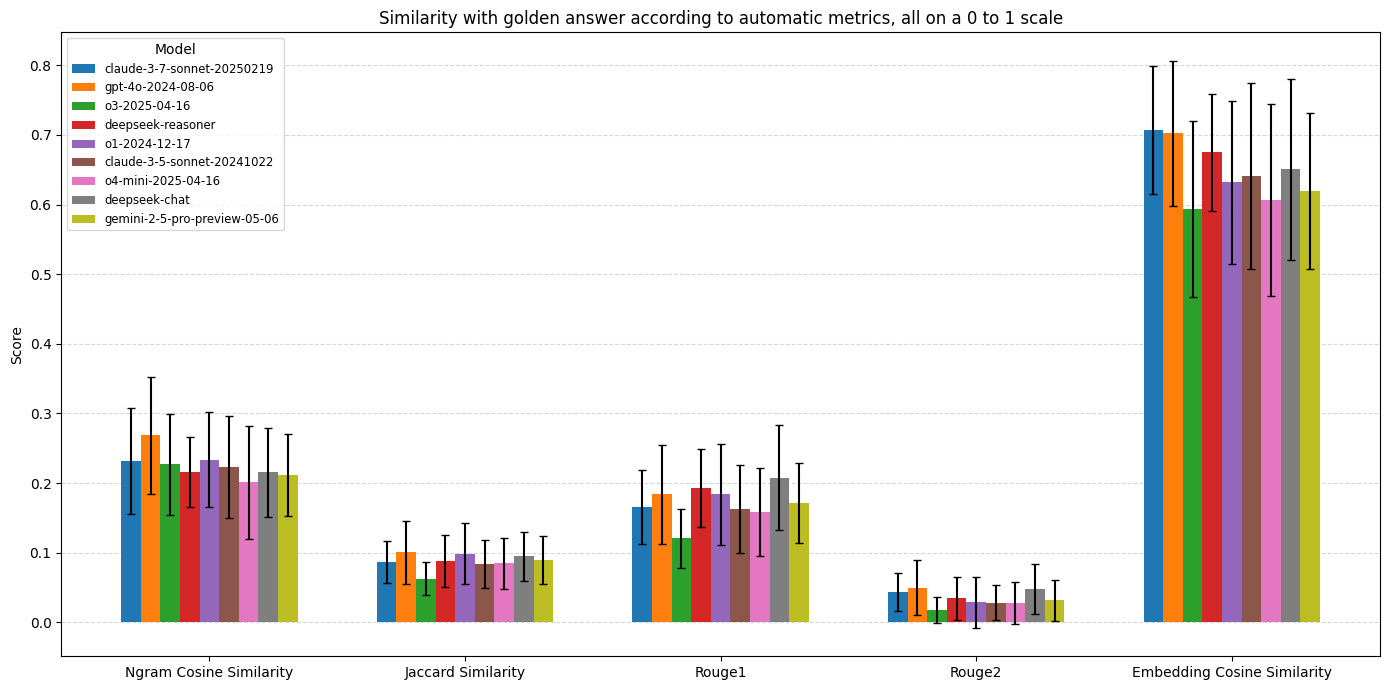

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Get unique models
models = eval_df['model'].unique()
n_models = len(models)

# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(automatic_metrics))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in automatic_metrics]
    stds = [model_data[metric].std() for metric in automatic_metrics]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('Similarity with golden answer according to automatic metrics, all on a 0 to 1 scale')
# ax.set_ylim(0, 1)
ax.set_xticks(positions)
ax.set_xticklabels([m.replace('_', ' ').title() for m in automatic_metrics])
ax.legend(title='Model', loc='upper left', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# LLM as a Judge

In [13]:
llm_judge_metrics_1_to_4 = ['comprehensiveness_llm_judge', 'intelligibility_llm_judge']
llm_judge_metrics_1_to_5 = ['relevance_llm_judge', 'actionability_llm_judge']

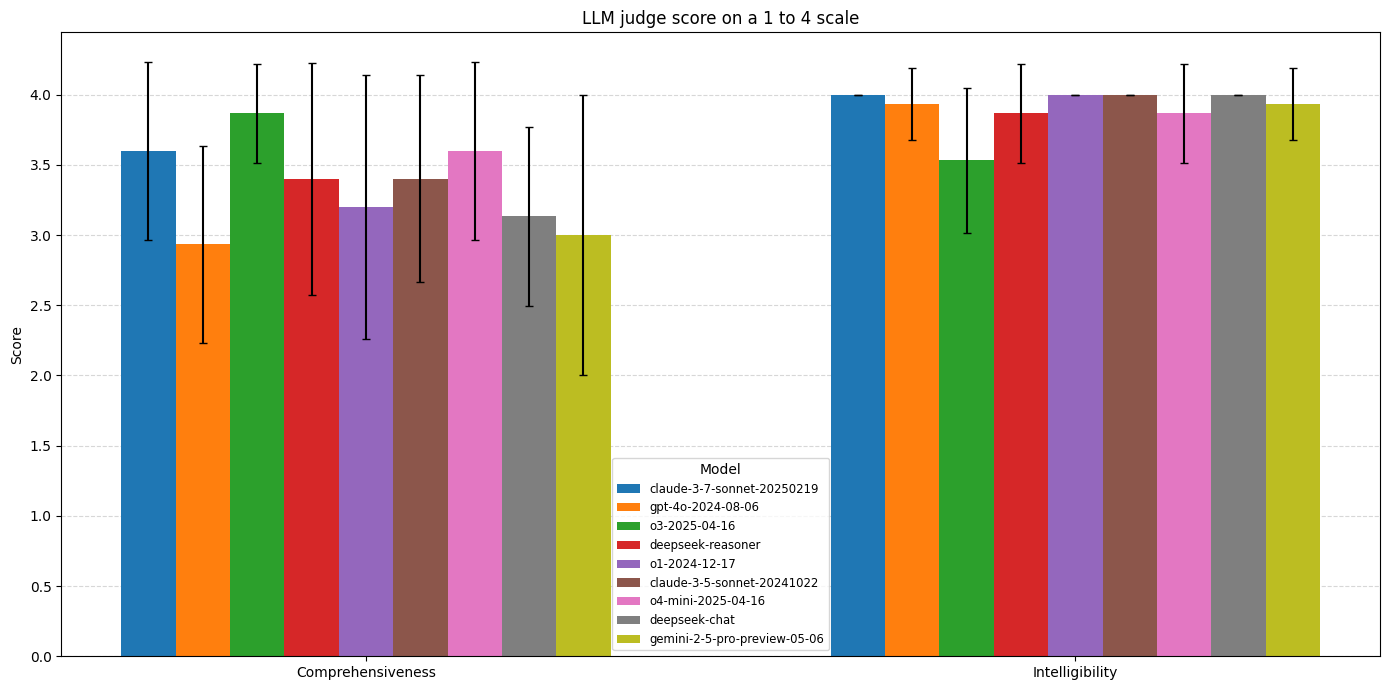

In [14]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(llm_judge_metrics_1_to_4))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in llm_judge_metrics_1_to_4]
    stds = [model_data[metric].std() for metric in llm_judge_metrics_1_to_4]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('LLM judge score on a 1 to 4 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in llm_judge_metrics_1_to_4])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

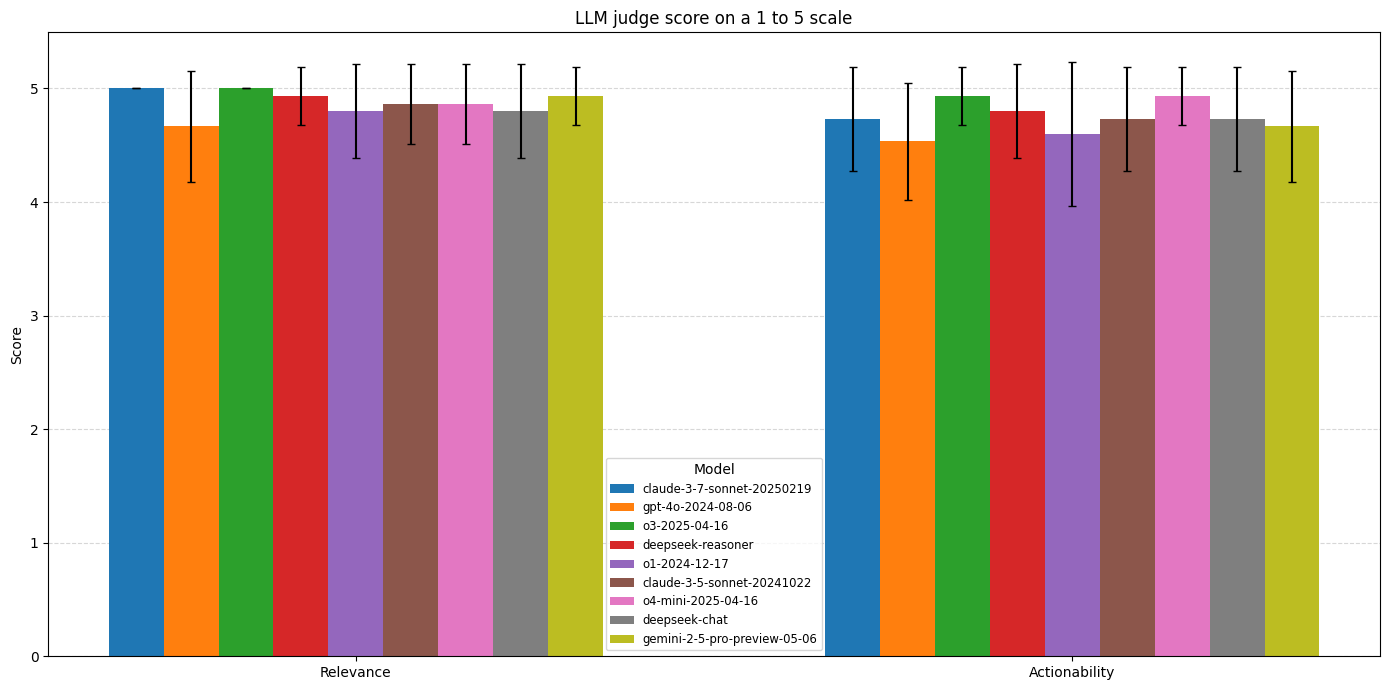

In [15]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(llm_judge_metrics_1_to_5))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in llm_judge_metrics_1_to_5]
    stds = [model_data[metric].std() for metric in llm_judge_metrics_1_to_5]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('LLM judge score on a 1 to 5 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in llm_judge_metrics_1_to_5])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Agronomist Evaluation

In [16]:
human_metrics_1_to_4 = ['comprehensiveness_human', 'intelligibility_human']
human_metrics_1_to_5 = ['relevance_human', 'actionability_human']

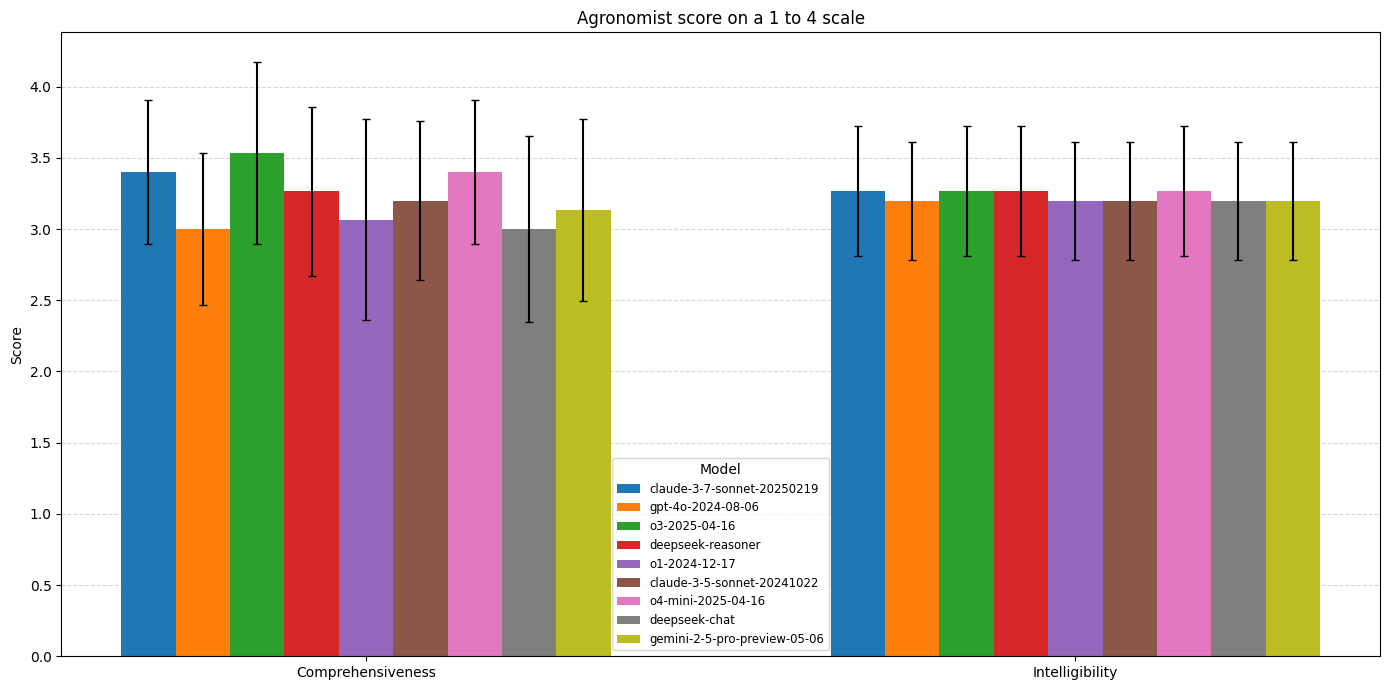

In [17]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(human_metrics_1_to_4))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in human_metrics_1_to_4]
    stds = [model_data[metric].std() for metric in human_metrics_1_to_4]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('Agronomist score on a 1 to 4 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in human_metrics_1_to_4])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

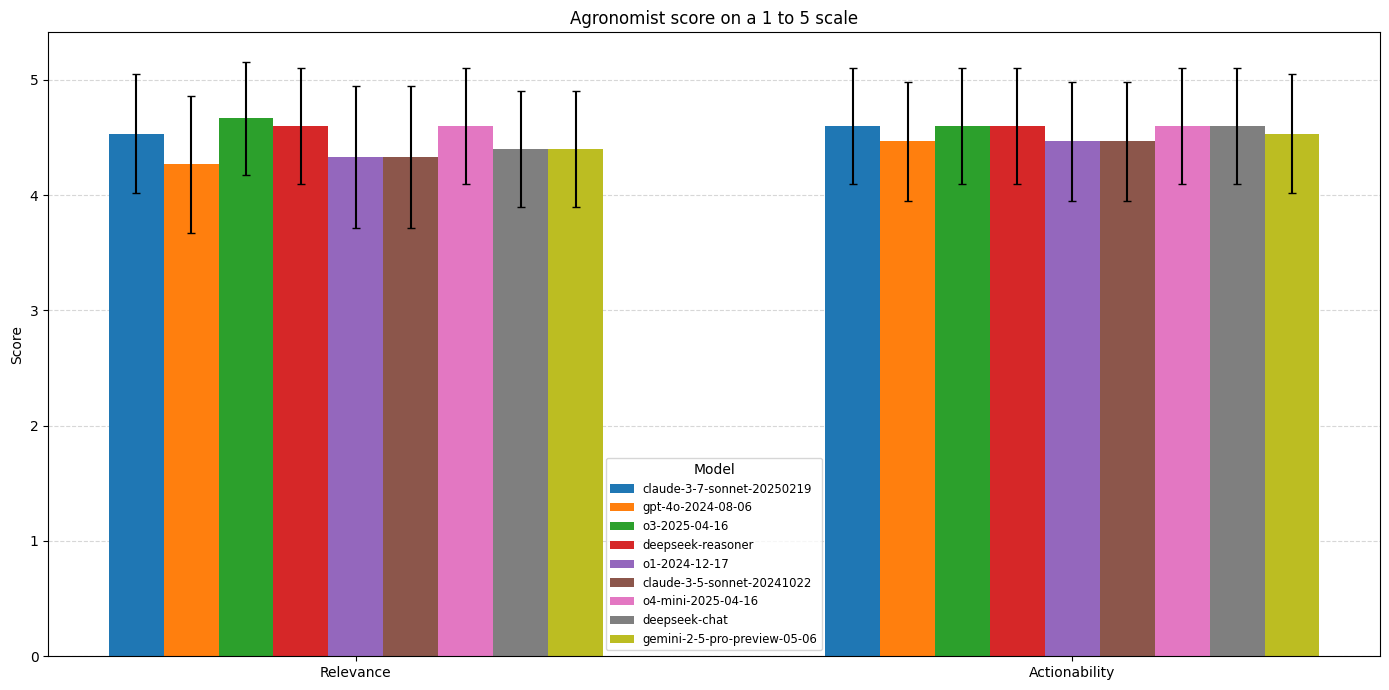

In [18]:
# Set up the figure
fig, ax = plt.subplots(figsize=(14, 7))

# Set width of bars and positions
bar_width = 0.69 / n_models
positions = np.arange(len(human_metrics_1_to_5))

# Plot bars for each model
for i, model in enumerate(models):
    model_data = eval_df[eval_df['model'] == model]
    means = [model_data[metric].mean() for metric in human_metrics_1_to_5]
    stds = [model_data[metric].std() for metric in human_metrics_1_to_5]
    
    pos = positions + (i - n_models/2 + 0.5) * bar_width
    # Simplify model name for readability
    simplified_name = '-'.join(model.split('-')[1:]) if len(model.split('-')) > 1 else model
    ax.bar(pos, means, bar_width, yerr=stds, label=simplified_name, capsize=3)

# Customize the plot
ax.set_ylabel('Score')
ax.set_title('Agronomist score on a 1 to 5 scale')
ax.set_xticks(positions)
ax.set_xticklabels([m.split('_')[0].capitalize() for m in human_metrics_1_to_5])
ax.legend(title='Model', loc='best', fontsize='small')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

# Factual Correctness and Harmfulness

In [19]:
# compare human and LLM judge scores for factual correctness and harmfulness
human_factual_correctness = eval_df['factual_correctness_human']
llm_factual_correctness = eval_df['factual_correctness_llm_judge']
human_harmfulness = eval_df['harmfulness_human']
llm_harmfulness = eval_df['harmfulness_llm_judge']

print("Human Factual Correctness Mean:", human_factual_correctness.mean(), "Std:", human_factual_correctness.std())
print("LLM Judge Factual Correctness Mean:", llm_factual_correctness.mean(), "Std:", llm_factual_correctness.std())
print("Human Harmfulness Mean:", human_harmfulness.mean(), "Std:", human_harmfulness.std())
print("LLM Judge Harmfulness Mean:", llm_harmfulness.mean(), "Std:", llm_harmfulness.std())

Human Factual Correctness Mean: 1.0 Std: 0.0
LLM Judge Factual Correctness Mean: 0.9851851851851852 Std: 0.12126110875009045
Human Harmfulness Mean: 0.0 Std: 0.0
LLM Judge Harmfulness Mean: 0.007407407407407408 Std: 0.08606629658238704


# Correlation Analysis

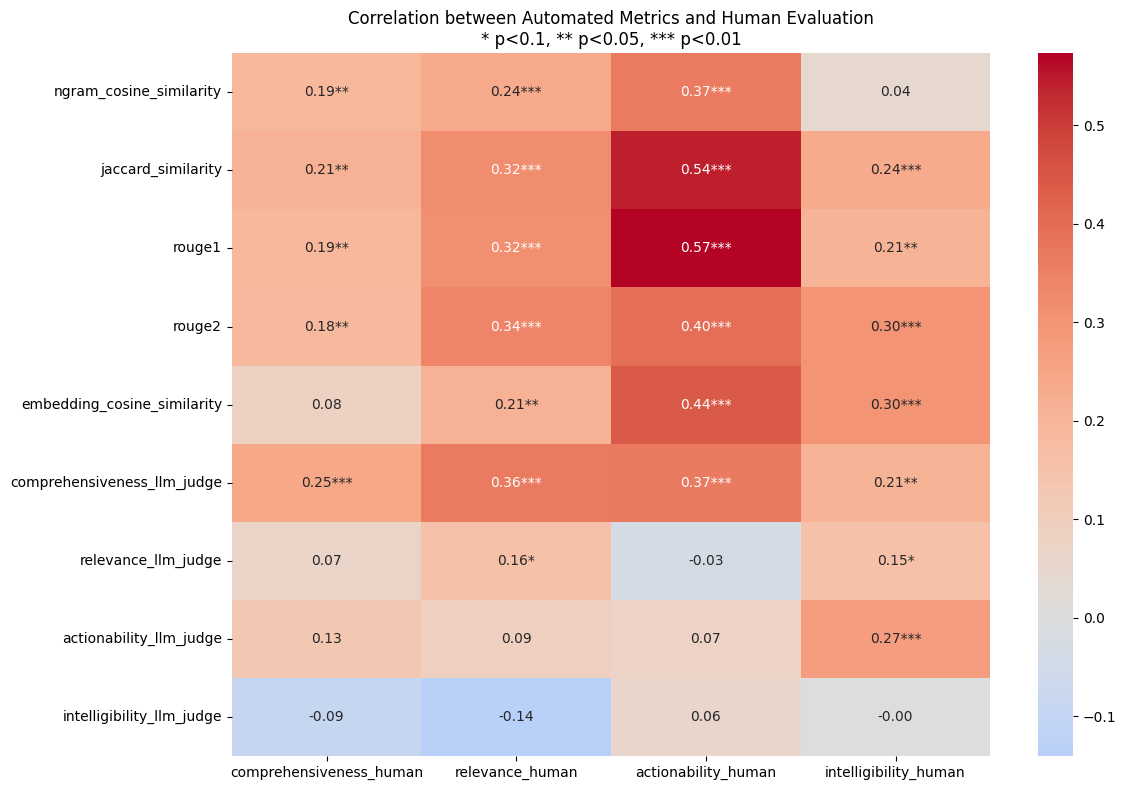

Highest correlation for each human evaluation metric:
comprehensiveness_human: comprehensiveness_llm_judge (r=0.247***, p=0.0039)
relevance_human: comprehensiveness_llm_judge (r=0.362***, p=0.0000)
actionability_human: rouge1 (r=0.573***, p=0.0000)
intelligibility_human: rouge2 (r=0.305***, p=0.0003)


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Convert boolean columns to integers for correlation analysis
eval_df_corr = eval_df.copy()
bool_columns = ['factual_correctness_llm_judge', 'harmfulness_llm_judge',
                'factual_correctness_human', 'harmfulness_human']
for col in bool_columns:
    eval_df_corr[col] = eval_df_corr[col].astype(int)

# Define the automated metrics and human evaluation metrics
automated_metrics = ['ngram_cosine_similarity', 'jaccard_similarity', 'rouge1', 
                     'rouge2', 'embedding_cosine_similarity',
                     'comprehensiveness_llm_judge', 'relevance_llm_judge',
                     'actionability_llm_judge', 'intelligibility_llm_judge']
human_metrics = [
    'comprehensiveness_human', 'relevance_human',
    'actionability_human', 'intelligibility_human'
    ]

# Calculate correlation matrix between automated metrics and human evaluation
correlation_matrix = eval_df_corr[automated_metrics + human_metrics].corr()
correlation_subset = correlation_matrix.loc[automated_metrics, human_metrics]

# Calculate p-values for correlations
p_values = np.zeros_like(correlation_subset.values)
for i, auto_metric in enumerate(automated_metrics):
    for j, human_metric in enumerate(human_metrics):
        r, p = stats.pearsonr(eval_df_corr[auto_metric], eval_df_corr[human_metric])
        p_values[i, j] = p

# Create a formatted annotation with correlation and significance markers
def create_annotation(corr, pval):
    annotation = f"{corr:.2f}"
    if pval < 0.01:
        annotation += "***"
    elif pval < 0.05:
        annotation += "**"
    elif pval < 0.1:
        annotation += "*"
    return annotation

annotations = np.empty_like(correlation_subset.values, dtype=object)
for i in range(len(automated_metrics)):
    for j in range(len(human_metrics)):
        annotations[i, j] = create_annotation(correlation_subset.values[i, j], p_values[i, j])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_subset, annot=annotations, fmt="", cmap='coolwarm', center=0)
plt.title('Correlation between Automated Metrics and Human Evaluation\n* p<0.1, ** p<0.05, *** p<0.01')
plt.tight_layout()
plt.show()

# Find the highest correlation for each human metric and report significance
print("Highest correlation for each human evaluation metric:")
for human_metric in human_metrics:
    best_metric_idx = correlation_subset[human_metric].abs().idxmax()
    corr_value = correlation_subset.loc[best_metric_idx, human_metric]
    p_value = p_values[automated_metrics.index(best_metric_idx), human_metrics.index(human_metric)]
    sig_markers = ""
    if p_value < 0.01:
        sig_markers = "***"
    elif p_value < 0.05:
        sig_markers = "**"
    elif p_value < 0.1:
        sig_markers = "*"
    print(f"{human_metric}: {best_metric_idx} (r={corr_value:.3f}{sig_markers}, p={p_value:.4f})")